In [1]:
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def lv_length(
    pop,
    peak_kw_pp=2,
    people_per_hh=4,
    cell_area=1,
    line_capacity=10,
):
    """
    Calculate length of low-voltage lines in a grid cell.
    
    Parameters
    ----------
    pop : int
        Number of people.
    peak_kw_pp : float
        Peak kW demand per person.
    people_per_hh : int
        Num people per household.
    cell_area : float
        Size of grid cell in km2.
    line_capacity : float
        LV line carrying capacity in kW/line.
        
    Returns
    -------
    total_lv_length : float
        Length of LV lines in km.
    """

    if pop < 1:
        return 0
    
    num_lines = pop*peak_kw_pp/line_capacity
    unit_length = sqrt(cell_area/(pop/people_per_hh))
    total_length = num_lines*unit_length
    
    return total_length

In [4]:
# GBR
lv_length(
    pop=878,
    peak_kw_pp=2,
    people_per_hh=3,
    line_capacity=15,
)

6.843001290856714

In [5]:
# UGA
lv_length(
    pop=940,
    peak_kw_pp=0.1,
    people_per_hh=5,
    line_capacity=15,
)

0.45704364002673625

In [3]:
# Above formula is effectively:
# 0.4x^0.5

In [4]:
f1 = np.vectorize(lv_length,otypes=[np.float32])
x = np.arange(0, 20000)
y1 = f1(x)

# Formula from Conrad for pop/km2 is
y2 = 0.208*x**0.5751

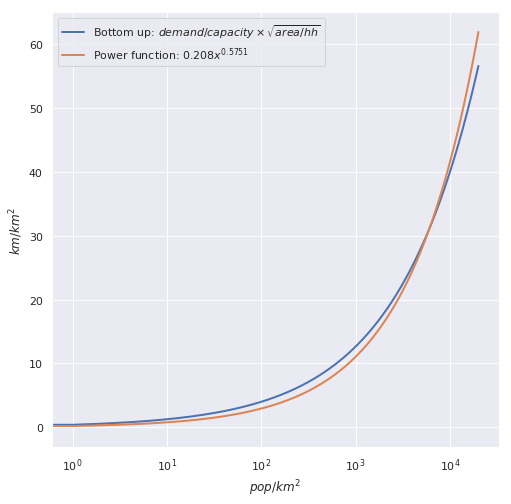

In [5]:
sns.set()
fig, ax = plt.subplots(figsize=(8,8))
ax.semilogx(x, y1, linewidth=2, label=r"Bottom up: $demand/capacity \times \sqrt{area/hh}$")
ax.semilogx(x, y2, linewidth=2, label=r"Power function: $0.208x^{0.5751}$")

plt.xlabel("$pop/km^2$")
plt.ylabel("$km/km^2$")
ax.legend()
plt.show()